In [215]:
in_file =r'../../data/clean/articles.csv' 

import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

import matplotlib.pyplot as plt
%matplotlib inline


In [216]:
articles=pd.read_csv(in_file,index_col=False)
articles.CR.fillna('',inplace=True)
df_ref=articles.CR
refs_dict={}
i=0
for ref in df_ref:
    refs_dict[i]=[ref for ref in ref.split('; ')]
    i=i+1

In [217]:
cite = open('../csv/cite_all.csv', 'w')
cite.write('citing,cited\n')

for row in refs_dict:
    for ref in refs_dict[row]:
        cite.write(str(row)+','+ ref.replace(',','')+'\n')
cite.close()

In [218]:
cite_all=pd.read_csv('../csv/cite_all.csv')
cite_all.fillna('',inplace=True)

In [219]:
dg=cite_all.groupby('cited').count()
dg.reset_index(inplace=True)

In [220]:
cite_all['cited_id']=-1
i=0
dg_cited=dg.cited.values
for x in cite_all.cited:
    try:
        ind=dg[dg.cited==x].index[0]
        cite_all.set_value(i,'cited_id',ind)
    except:
        pass
    i=i+1
    if i % 1000 ==0:
        print i,
print

1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 64000 65000 66000 67000 68000 69000 70000 71000 72000 73000 74000 75000 76000 77000 78000 79000 80000 81000 82000 83000 84000 85000 86000 87000 88000 89000 90000 91000 92000 93000 94000 95000 96000 97000 98000 99000 100000 101000 102000 103000 104000 105000 106000 107000 108000 109000 110000 111000 112000 113000 114000 115000 116000 117000 118000 119000 120000 121000 122000 123000 124000 125000 126000 127000 128000 129000 130000 131000 132000 133000 134000 135000 136000 137000 138000 139000 140000 141000


In [221]:
#cite_all=cite_all[cite_all.cited_id>-1]

In [222]:
df=cite_all[['citing','cited_id']]
df.to_csv('../csv/cite_all_id.csv',index=False)

In [223]:
df=pd.read_csv('../csv/cite_all_id.csv')

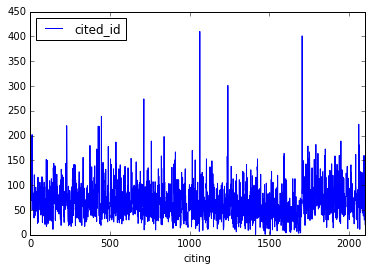

In [224]:
dg=df.groupby('citing').count().plot()

In [225]:
x=df.citing.max()
y=df.cited_id.max()
mm=np.zeros((x+1,y+1))
mm.shape

(2101L, 74662L)

In [226]:
for row in df.iterrows():
    mm[row[1][0],row[1][1]]=1

In [227]:
count=0
for row in range (x+1):
    if np.sum(mm[row])<20:
        count=count+1;
        mm[row]=np.zeros(y+1)
print count

96


In [228]:
#bib=np.triu(np.dot(mm,mm.transpose()),1)
bib = 1-pairwise_distances(mm, metric="cosine")
bib = np.round(np.triu(bib,1),3)
bib.shape

(2101L, 2101L)

In [229]:
np.where(bib>.6)

(array([1198], dtype=int64), array([1236], dtype=int64))

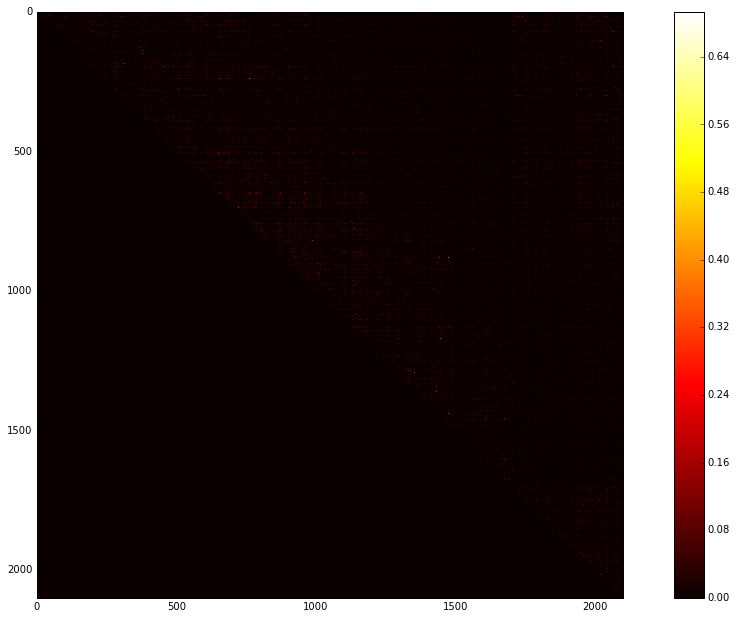

In [230]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.imshow(bib, cmap=plt.cm.hot)
plt.colorbar()
plt.show()

In [231]:
biblio = open('../csv/bib.csv', 'w')
biblio.write('source,target,weight,type\n')

for row in range(bib.shape[0]):
    for col in range(row,bib.shape[1]):
        if bib[row][col] > 0:
            biblio.write(str(row)+','+str(col)+','+str(bib[row][col])+',undirected\n')
biblio.close()
bib_df=pd.read_csv('../csv/bib.csv')
bib_df.shape

(319851, 4)

In [232]:
bib_df=bib_df[bib_df.weight>.05]
bib_df.shape

(30501, 4)

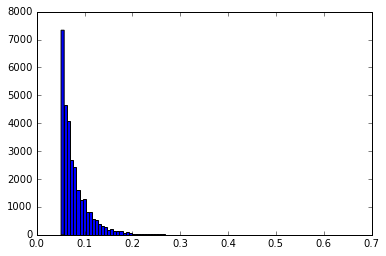

In [233]:
l=bib_df.weight
hist=plt.hist(l,100)

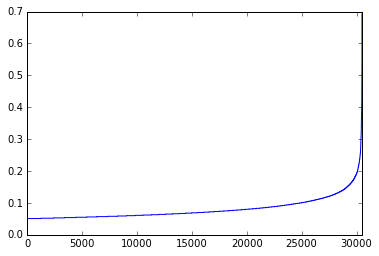

In [234]:
l=l.sort_values()
l=l.reset_index(drop=True)
l.plot(drawstyle='steps')

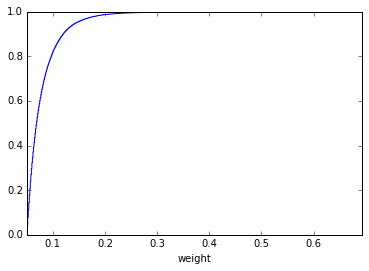

In [235]:
cum_dist = np.linspace(0.,1.,len(l))
cdf = pd.Series(cum_dist, index=l)
cdf.plot()

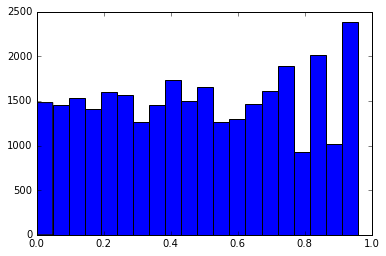

In [236]:
dic=cdf.to_dict()
bib_df['p']=bib_df.weight.apply(lambda x :1- dic[x])
p=bib_df[bib_df.weight>0].p
binwidth=.01
hist=plt.hist(p,20)

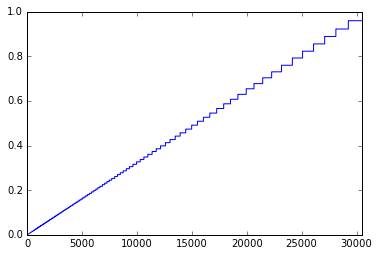

In [237]:
p=bib_df.p
p=p.sort_values()
p=p.reset_index(drop=True)
p.plot(drawstyle='steps')

In [238]:
bib_df.shape

(30501, 5)

In [239]:
bib_df['old_weight']=bib_df.weight
bib_df.drop('weight',inplace=True,axis=1)
bib_df['weight']=1-bib_df.p
bib_df[['source','target','weight','type']].to_csv('../csv/p_bib.csv',index=False)

In [240]:
bib_df.shape

(30501, 6)